In [9]:
!pip install xarray

     |████████████████████████████████| 827 kB 1.0 MB/s eta 0:00:01


In [ ]:
# Question No 1 iii) time series for change in grace ground water change in given range 2002-2021

In [1]:
import netCDF4
import h5py

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
# ds = netCDF4.Dataset(fil
import os
os.listdir()

['Question 1 iii.ipynb',
 'EMSC3025 aÌ\x82Â\x80Â\x93 ASSIGNMENT 2.pdf',
 'MDB_north_south',
 'GW273166.1.1.csv',
 'GW273167.2.2.csv',
 'GW403747.3.3.csv',
 '.ipynb_checkpoints',
 'MDB_north_south.zip',
 'GW040956.3.3.csv',
 'MDB_boundaries',
 'Soil_Deep_pct_Relative_month.nc',
 'GW036211.1.1.csv',
 'MDB_boundaries.zip',
 'shapefiles_example_code.jpeg',
 'Soil_Lower_pct_Relative_month.nc',
 '.DS_Store',
 'Question 1 i.ipynb',
 'GW036582.2.2.csv',
 'Soil_Root_zone_pct_Relative_month.nc',
 'CSR_GRACE_GRACE-FO_RL06_Mascons_all-corrections_v02.nc',
 'GW036871.3.3.csv',
 'Soil_Upper_pct_Relative_month.nc',
 'GW036597.1.2.csv',
 'GW036275.2.2.csv',
 'GW036284.2.2.csv']

In [3]:
import pandas as pd
ds = netCDF4.Dataset("CSR_GRACE_GRACE-FO_RL06_Mascons_all-corrections_v02.nc")
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6, ACDD-1.3, ISO 8601
    filename: netcdf/CSR_GRACE_GRACE-FO_RL06_Mascons_all-corrections_v02.nc
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    standard_name_vocabulary: NetCDF Climate and Forecast (CF) Metadata Convention-1.6
    title: CSR GRACE and GRACE-FO MASCON RL06Mv2
    subtitle: GRACE/GRACE-FO Total water storage with all correction applied
    summary: Monthly mass anomaly grids from GRACE and GRACE-FO determined from CSR RL06 processing
    keywords: Solid Earth, Geodetics/Gravity, Gravity, liquid_water_equivalent_thickness
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Science Keywords
    platform: GRACE and GRACE-FO
    institution: The University of Texas - Center for Space Research (CSR)
    creator_name: Himanshu Save
    creator_email: grace@csr.utexas.edu
    creator_url: http://www2.csr.utexas.edu/grace
    creator_type: gr

In [4]:
ds.variables

{'time_bounds': <class 'netCDF4._netCDF4.Variable'>
 float32 time_bounds(time, timebound)
 unlimited dimensions: 
 current shape = (197, 2)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 float32 time(time)
     bounds: time_bounds
     calendar: gregorian
     axis: T
     standard_name: Time
     long_name: Time
     Units: days since 2002-01-01T00:00:00Z
 unlimited dimensions: 
 current shape = (197,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float32 lon(lon)
     bounds: lon_bounds
     valid_max: 359.875
     valid_min: 0.125
     axis: X
     standard_name: Longitude
     long_name: Longitude
     Units: degrees_east
 unlimited dimensions: 
 current shape = (1440,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lat': <class 'netCDF4._netCDF4.Variable'>
 float32 lat(lat)
     bounds: lat_bounds
     valid_max: 89.875
     valid_min: -89.8

In [22]:
# opening the file using xarray
import xarray as xr
nc = xr.open_dataset("CSR_GRACE_GRACE-FO_RL06_Mascons_all-corrections_v02.nc")


In [26]:
#conversion of days to with the reference date

# nc
units, reference_date = nc['time'].Units.split('since')

nc['time'] = netCDF4.num2date(nc['time'], nc['time'].Units, nc['time'].calendar)


# selecting only the data between 2002 and 2021
# filtering the data

nc  = nc.where((nc['time'].dt.strftime('%Y') >'2002')&(nc['time'].dt.strftime('%Y') <'2021'))
nc

<xarray.Dataset>
Dimensions:        (time: 197, timebound: 2, lat: 720, lon: 1440)
Coordinates:
  * time           (time) object 2002-04-18 00:00:00 ... 2021-05-16 12:00:00
  * lon            (lon) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * lat            (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
Dimensions without coordinates: timebound
Data variables:
    time_bounds    (time, timebound) float32 nan nan nan nan ... nan nan nan nan
    lwe_thickness  (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes: (12/58)
    Conventions:                CF-1.6, ACDD-1.3, ISO 8601
    filename:                   netcdf/CSR_GRACE_GRACE-FO_RL06_Mascons_all-co...
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    title:                      CSR GRACE and GRACE-FO MASCON RL06Mv2
    subtitle:                   GRACE/GRACE-FO Total water storage with all c...
    ...                         ...
    user_note_2:                The accelerometer on the GRACE-FO 2 spacecraf...
    user_note_3:                Ellipsoidal correction has been applied. The ...
    date_created:               2021-07-28T12:31:39Z
    variable:                   liquid water equivalent thickness
    label:                      RL06rc24cE
    Mask:                       Global

<xarray.DataArray 'year' (time: 197)>
array([2002, 2002, 2002, 2002, 2002, 2002, 2002, 2003, 2003, 2003, 2003,
       2003, 2003, 2003, 2003, 2003, 2003, 2003, 2004, 2004, 2004, 2004,
       2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2005, 2005, 2005,
       2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2006, 2006,
       2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2007,
       2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007,
       2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008,
       2008, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009,
       2009, 2009, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
       2010, 2010, 2010, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
       2011, 2011, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012,
       2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2014,
       2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2015, 2015, 2015,
       2015, 2015, 2015, 2015, 2015, 2015, 2016, 2016, 2016, 2016, 2016,
       2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017, 2018, 2018,
       2018, 2018, 2018, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
       2019, 2019, 2019, 2019, 2020, 2020, 2020, 2020, 2020, 2020, 2020,
       2020, 2020, 2020, 2020, 2020, 2021, 2021, 2021, 2021, 2021])
Coordinates:
  * time     (time) object 2002-04-18 00:00:00 ... 2021-05-16 12:00:00

In [46]:
nc

<xarray.Dataset>
Dimensions:        (time: 197, timebound: 2, lat: 720, lon: 1440)
Coordinates:
  * time           (time) object 2002-07-21 00:00:00 ... 2021-08-18 12:00:00
  * lon            (lon) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * lat            (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
Dimensions without coordinates: timebound
Data variables:
    time_bounds    (time, timebound) float32 nan nan nan nan ... nan nan nan nan
    lwe_thickness  (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes: (12/58)
    Conventions:                CF-1.6, ACDD-1.3, ISO 8601
    filename:                   netcdf/CSR_GRACE_GRACE-FO_RL06_Mascons_all-co...
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    title:                      CSR GRACE and GRACE-FO MASCON RL06Mv2
    subtitle:                   GRACE/GRACE-FO Total water storage with all c...
    ...                         ...
    user_note_2:                The accelerometer on the GRACE-FO 2 spacecraf...
    user_note_3:                Ellipsoidal correction has been applied. The ...
    date_created:               2021-07-28T12:31:39Z
    variable:                   liquid water equivalent thickness
    label:                      RL06rc24cE
    Mask:                       Global

In [17]:
lat = nc['lat'][:]
lon = nc['lon'][:]
data = nc['lwe_thickness'][:, :,:]
data_mean = data.mean(['lat', 'lon']) 
data_mean

<xarray.DataArray 'lwe_thickness' (time: 197)>
array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,  0.19007275,  0.22217308,  0.6615236 ,
        0.8640032 ,  0.75480217,  0.6334031 ,  0.42685568,  0.21245383,
        0.28649208,  0.27266562,  0.0336593 , -0.14670403, -0.04717903,
        0.24274537,  0.26689088,  0.4422782 ,  0.5711406 ,  0.6222273 ,
        0.4389223 ,  0.20196663,  0.32328475,  0.18480821, -0.48407528,
       -0.4164226 , -0.4925905 ,  0.02510765,  0.33522156,  0.3124264 ,
        0.9454436 ,  0.55045897,  0.4205685 ,  0.09586019,  0.1808305 ,
       -0.07055546, -0.74690735, -0.31307244, -0.3104211 , -0.06392319,
        0.0733422 ,  0.23992659,  0.44637135,  0.49884626,  0.12788081,
        0.11080107,  0.31459075,  0.08735685, -0.17100638, -0.6005406 ,
        0.28777665, -0.328879  , -0.09275682,  0.27308744,  0.801211  ,
        0.3484759 ,  0.24733171,  0.1194243 , -0.03654275, -0.31937343,
       -0.13844082, -0.665753  , -0.21495591, -0.32295665,  0.21600041,
        0.35504973,  0.2795555 ,  0.15362822,  0.22382896, -0.05798745,
       -0.51272094, -0.5566318 , -0.7232172 , -0.6530371 , -0.44722897,
       -0.5800586 , -0.39650238,  0.01805621,  0.3148462 ,  0.12602288,
       -0.13399959, -0.29001972, -0.22568735, -0.55675054, -0.70669585,
       -0.94695824, -0.8768738 , -0.42364085, -0.39718518, -0.06705365,
        0.1655878 , -0.10031974, -0.21839133, -0.40339383, -0.5696144 ,
       -0.3679967 , -0.8993724 , -0.21342103, -1.0865996 , -0.36342034,
       -0.35383266, -0.3596792 , -0.44788128, -0.6343887 , -0.7634614 ,
       -0.6979056 , -1.5609672 , -1.4572852 , -1.3444952 , -1.1162621 ,
       -0.83144367, -0.5040255 , -0.8180839 , -0.70940495, -1.0863916 ,
       -1.4403855 , -1.7452148 , -1.3541573 , -1.2133421 , -0.88543916,
       -0.9531256 , -0.80982447, -0.6099234 , -1.30018   , -1.2969593 ,
       -1.1614099 , -1.5528666 , -1.2458754 , -0.9820585 , -0.9733723 ,
       -0.72815794, -1.0888573 , -1.2493763 , -1.1192914 , -0.9981409 ,
       -1.9499488 , -1.9907742 , -1.5841151 , -1.3761582 , -1.2362679 ,
       -0.8993382 , -1.1580741 , -1.3820001 , -1.5843979 , -1.6681148 ,
       -1.877196  , -1.5003902 , -1.1166606 , -1.1416565 , -1.1126053 ,
       -1.4746666 , -2.028791  , -1.7888423 , -2.1842525 , -1.609185  ,
       -1.4276409 , -1.069478  , -0.8720709 , -1.0869335 , -1.1513112 ,
       -1.8132976 , -1.5752194 , -2.1493638 , -2.0863736 , -1.8475801 ,
       -1.6153504 , -1.089243  , -1.3943884 , -1.1991994 , -1.2769271 ,
       -1.6390024 , -1.4439826 , -1.5370313 , -2.0336242 , -2.0082824 ,
       -2.0633361 , -2.0117502 , -1.553048  , -1.8273824 , -1.4539076 ,
       -1.2114265 , -1.4766    , -1.3257169 , -2.1279485 , -2.1212997 ,
       -2.0487761 , -2.1257765 ,         nan,         nan,         nan,
               nan,         nan], dtype=float32)
Coordinates:
  * time     (time) object 2002-04-18 00:00:00 ... 2021-05-16 12:00:00

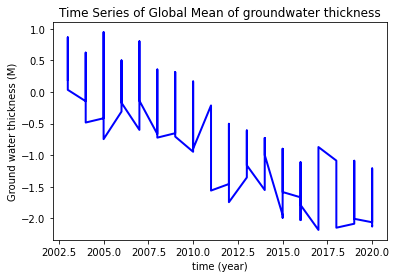

In [46]:
# plotting the time series for the change in groundwater

t_index = nc['time'].dt.year

plt.plot(t_index, data_mean, color='blue', linewidth=2, label='Groundwater Thickness')
plt.title('Time Series of Global Mean of groundwater thickness')
plt.xlabel('time (year)')
plt.ylabel('Ground water thickness (M)')
plt.show()
